# Fitting curves to point clouds using numpy and scipy

**In this tutorial, we make our lives a bit easier and use some pre-defined fitting functions.**

In [1]:
# Numerical operations:
import numpy as np

# Plotting library:
import matplotlib.pyplot as plt

# Minimizing/fitting library:
import scipy.optimize

## Fitting lines or polynomial

Fitting a polynomial to a point cloud.
For this we use the ``polyfit`` function of numpy (https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html). 

Source: https://stackoverflow.com/questions/19165259/

Let's start by defining some points and their x and y projections:

In [2]:
points = np.array([(1, 1), (2, 4), (3, 1), (9, 3), (10, 10)])
x = points[:,0]
y = points[:,1]

Plot them:

<div class="alert alert-block alert-success">
<b>Exercise 1 [super-easy]:</b> Plot the points
</div>

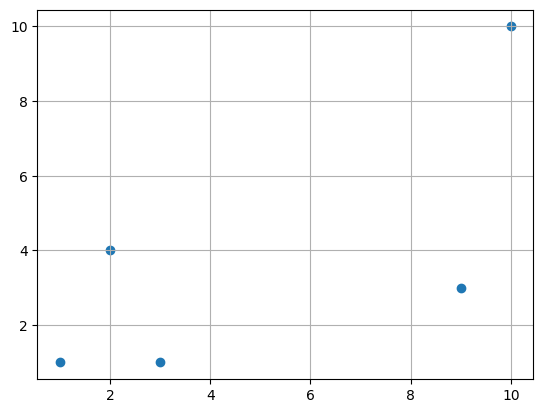

In [3]:
plt.scatter(x,y)
plt.grid()

Fitting a polynomial of degree ``deg`` is easy as calling:

In [4]:
coeffs = np.polyfit(x, y, deg=3)

The vector ``coeffs`` now contains the coefficients of the polynomial as a vector of length ``deg+1``:

In [5]:
coeffs

array([ 0.11612758, -1.51752022,  4.75853549, -1.80242588])

It's easy to also get the corresponding function:

In [6]:
f = np.poly1d(coeffs)

<div class="alert alert-block alert-success">
<b>Exercise 2 [super-easy]:</b> Evaluate the difference $f(x)-y$ and interpret them.
</div>

In [7]:
diffs = f(x) - y
diffs

array([ 0.55471698, -1.42641509,  0.9509434 , -0.23773585,  0.15849057])

Let's finally have a look at the fit:

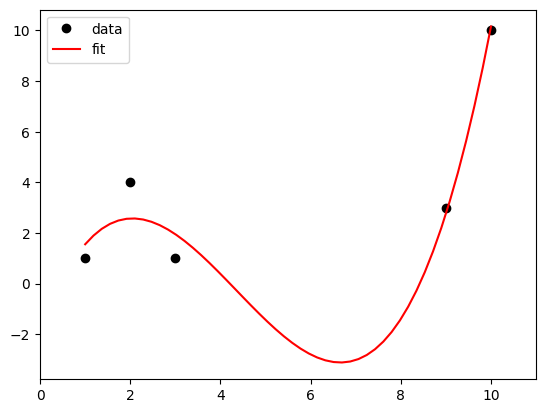

In [8]:
# Some points where we evaluate our new function
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

# Plot the datapoints
plt.plot(x, y, 'ko', label="data")

# Plot our fitted polynomial
plt.plot(x_new, y_new, 'r-', label="fit")

# Add legend etc
plt.legend()
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

<div class="alert alert-block alert-success">
<b>Exercise 3 [easy]:</b> Fit a straight line to the following dataset and determine the line parameters. Bonus points: Also plot the fit as above.
</div>

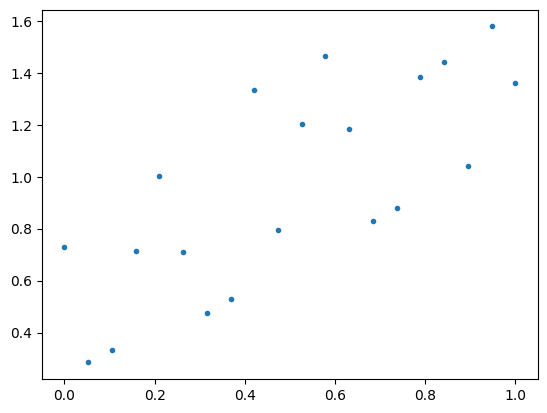

In [9]:
x_exercise3 = np.linspace(0, 1, 20)
y_exercise3 = x_exercise3 + np.random.random(len(x_exercise3))
plt.plot(x_exercise3, y_exercise3, ".")

y = m*x + t, m = 0.947, t = 0.490


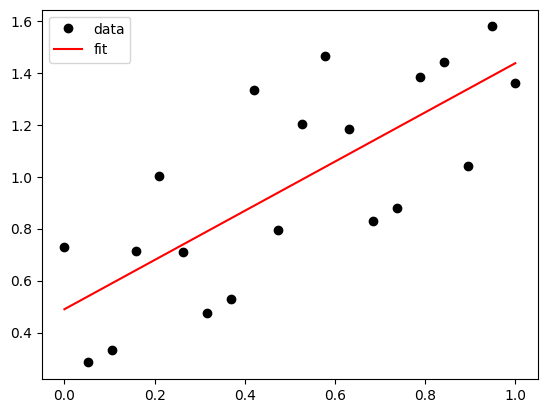

In [10]:
coeffs_3 = np.polyfit(x_exercise3, y_exercise3, deg=1)
print(f"y = m*x + t, m = {coeffs_3[0]:.3f}, t = {coeffs_3[1]:.3f}")
f_3 = np.poly1d(coeffs_3)
x_plot = np.linspace(0,1,100)
plt.plot(x_exercise3, y_exercise3, 'ko', label="data")
plt.plot(x_plot, f_3(x_plot), 'r-', label="fit")
plt.legend()
plt.show()

## Fitting Gaussian (or any arbitrary function)

From https://stackoverflow.com/questions/19206332

Again let's generate some points:

In [11]:
x = np.asarray(range(10))
y = 0.3*x + np.asarray([0,1,2,3,4,5,4,3,2,1])

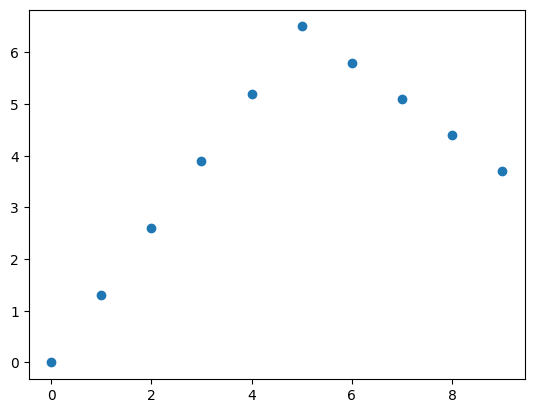

In [12]:
plt.scatter(x,y)

Here, we define our own function that we want to fit to our data points:

In [13]:
def gauss(x, norm, mean, sigma):
    # Note that this function takes a whole vector x of data!
    return norm * np.exp(-(x-mean)**2/(2*sigma**2))

This function has 3 free parameters, ``norm``, ``mean``, ``sigma``, which we will now fit using ``scipy.optimize.curve_fit`` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [14]:
popt, pcov = scipy.optimize.curve_fit(gauss, x, y)

The variable ``popt`` holds the parameters:

In [15]:
popt

array([6.19486497, 5.74654967, 2.78281294])

The other variable, ``pcov`` holds the covariance matrix of the fitted values. 
This gets relevant once you want to give errors on your fitted quantities, but we'll ignore this for now.

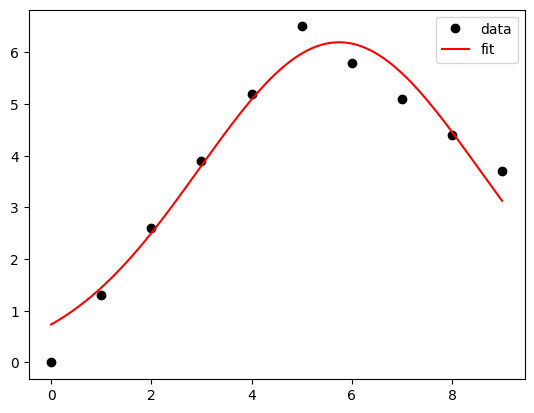

In [16]:
# Plot points
plt.plot(x, y,'ko',label='data')

# Plot our gaussian
# Define some points on the xaxis
x_fine = np.linspace(min(x), max(x), 200)
y_fine = gauss(x_fine, *popt)
# The *  unpacks the values from popt and uses them as
# parameters.

plt.plot(x_fine, y_fine, 'r-', label='fit')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
   <b>Exercise 4a [easy]:</b> 
Modify the above example so that the sigma above is 
    <b>fixed</b> to 1.
</div>

[8.23736029 5.35256314]


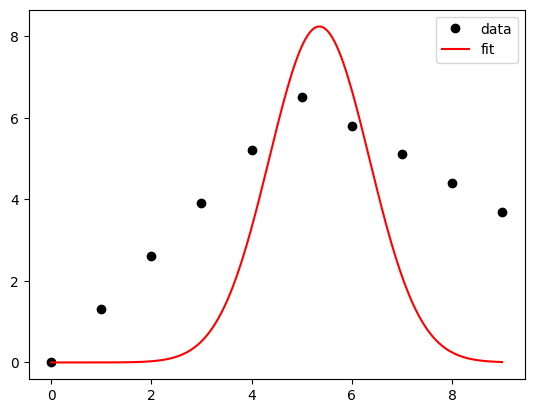

In [17]:
sigma = 1
popt, pcov = scipy.optimize.curve_fit((lambda x, norm, mean: gauss(x, norm, mean, sigma=sigma)), x, y)
print(popt)
plt.plot(x, y,'ko',label='data')
x_fine = np.linspace(min(x), max(x), 200)
y_fine = gauss(x_fine, *popt, sigma=sigma)
plt.plot(x_fine, y_fine, 'r-', label='fit')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
   <b>Exercise 4b [medium]:</b> 
Let's try to fit the same dataset with a slightly more complicated model that consists of a 
linear part plus a Gaussian, i.e. 
    
```f(x) = x + b + gaus(x, norm, mean, sigma)```

<b>Hint</b>:
Create a new function ``mymodel`` which takes the parameters ``x``, as well as all fitted parameters, i.e. ``b``, ``norm``, ``mean``, ``sigma``. In the definition you can also use the function ``gaus`` from above!
</div>

[-1.45264755e+04  1.45277853e+04  3.05202034e+00  1.95818295e+02]


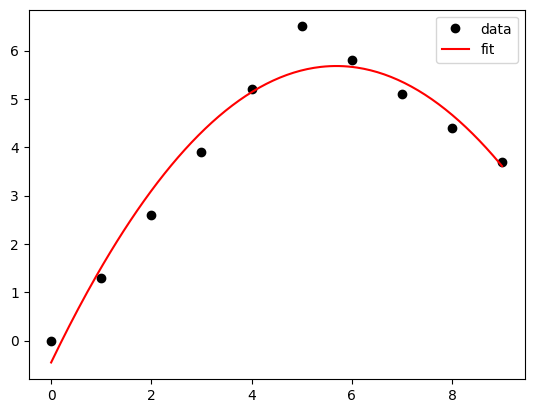

In [18]:
def mymodel(x, b, norm, mean, sigma):
    return x + b + gauss(x, norm, mean, sigma)
popt, pcov = scipy.optimize.curve_fit(mymodel, x, y)
print(popt)
y_fine = mymodel(x_fine, *popt)
plt.plot(x, y,'ko',label='data')
plt.plot(x_fine, y_fine, 'r-', label='fit')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
   <b>Exercise 4c [hard]:</b> 
Fit the above points as two lines, i.e. 

$$f(x) = \begin{cases}
  a_1 x + b_1 & \text{if}\ x<c\\
  a_2 x + b_2 & \text{if}\ x\geq c\\
\end{cases}$$

such that $a_1 c + b_1 = a_2 c + b_2$.
<p>
<b>Hint:</b> 
<ul>
<li>Solve the contraint for, say, <code>b2</code></li>
<li>Define a function <code>line(x, a1, b1, a2, c)</code></li>
<li>Note that <code>x</code> is a vector! Thus <code>if x&lt;c: ...</code> won't work. Rather, take a look at the function <code>np.where</code>.
</ul>
</div>

[ 1.30000000e+00 -4.39105567e-24 -7.00000000e-01  5.00000000e+00]


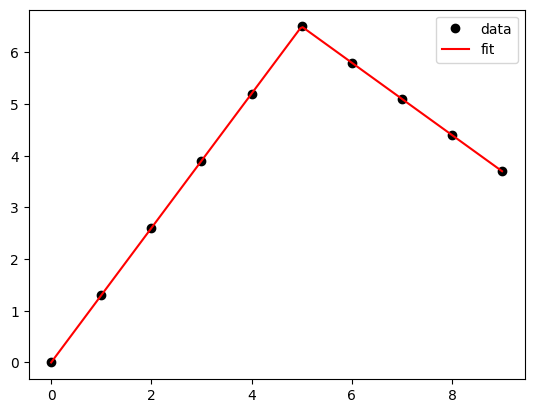

In [19]:
def line(x, a1, b1, a2, c):
    b2 = a1*c + b1 - a2*c
    return np.where(x<c, a1*x + b1, a2*x + b2)

popt, pcov = scipy.optimize.curve_fit(line, x, y)
print(popt)
y_fine = line(x_fine, *popt)
plt.plot(x, y,'ko',label='data')
plt.plot(x_fine, y_fine, 'r-', label='fit')
plt.legend()
plt.show()

# Extra chapter: Fit uncertainties and covariances

(taken from a [python ML course at LMU](https://github.com/fuenfundachtzig/LMU_DA_ML_Basic/blob/main/notebooks/Fitting.ipynb))

Also taking some inspiration from http://www.pp.rhul.ac.uk/~cowan/stat_course.html

The covariance matrix shows the variances on the fit parameters on the diagonal and their covariances on the off diagonal elements.

<div class="alert alert-block alert-info">

<b>Note:</b> Since we did not provide uncertainties on the data points (would be done using the <code>sigma</code> argument to <code>curve_fit</code>) the overall normalization of $\chi^2$ is undetermined. By default, `curve_fit` multiplies the covariance matrix by $\chi^2_\mathrm{min}/\mathrm{ndf}$ which effectively scales the uncertainties on the data points to match the observed residuals after the fit. This can be turned off by using <code>absolute_sigma=True</code> which can be used when uncertainties are provided.

</div>

Let's go back to the example with the line:

In [57]:
from scipy.optimize import curve_fit

x_data = np.linspace(-1, 1, 10)
y_data = -1 + 3 * x_data + 2 * np.random.random_sample(len(x_data))

def f(x, a, b):
    return a * x + b

pfit, pcov = curve_fit(f, x_data, y_data, p0=(1, 0))
pfit, pcov

(array([2.85200972, 0.14847787]),
 array([[1.18471472e-01, 4.11799186e-10],
        [4.11799186e-10, 4.82661517e-02]]))

So the one standard deviation errors on the fit parameters will be given by

In [58]:
a, b = pfit
a_err, b_err = np.sqrt(np.diag(pcov))
print("a = {:.2f} +/- {:.2f}".format(a, a_err))
print("b = {:.2f} +/- {:.2f}".format(b, b_err))

a = 2.85 +/- 0.34
b = 0.15 +/- 0.22


The covariances indicate how much the parameters are correlated, that is how much greater values of one parameter correspond to greater values of the other one.

In this case the covariance is very small:

In [59]:
pcov[0, 1]

np.float64(4.117991863953448e-10)

You can try out why that is. Change on of the parameters slightly and see if there is a way to get a better `chi2` again by changing the other one:

In [61]:
from ipywidgets import interact

@interact(
    a_test=(a - 0.5, a + 0.5, 0.05),
    b_test=(b - 0.5, b + 0.5, 0.05),
    continuous_update=False
)
def interactive_plot(a_test=a, b_test=b):
    plt.plot(x_data, y_data, "ko")
    yfit = f(x_data, a_test, b_test)
    yfit_min = f(x_data, a, b)
    plt.plot(x_data, yfit, label="test")
    plt.plot(x_data, yfit_min, "--", label="fit")
    plt.ylim(-4,4)
    plt.legend()
    plt.show()
    print("Chi2:", ((yfit - y_data) ** 2).sum())
    print("Chi2_min:", ((yfit_min - y_data) ** 2).sum())

interactive(children=(FloatSlider(value=2.8520097154444963, description='a_test', max=3.3520097154444963, min=…

Also, if we fix a to a value slightly away from the optimum, and fit `b` again, the optimal `b` won't change significantly:

In [66]:
b

np.float64(0.1484778702655343)

In [67]:
curve_fit(lambda x, b: f(x, a + 1, b), x_data, y_data, p0=(0))

(array([0.14847787]), array([[0.08817073]]))

In this case, we have the same number of points on the positive and negative x-axis, so a higher slope (parameter `a`) puts the data points on the positive x-axis below the fitted line and on the negative x-axis above the fitted line.

Changing the parameter `b` will cause an overall shift to the top or bottom, so there is no way to compensate a less optimal value of `a`.

The situation changes if we only look at data points on the positive x-axis:

In [68]:
x_data2 = np.linspace(0, 1, 10)
y_data2 = -1 + 3 * x_data2 + np.random.random_sample(len(x_data2))

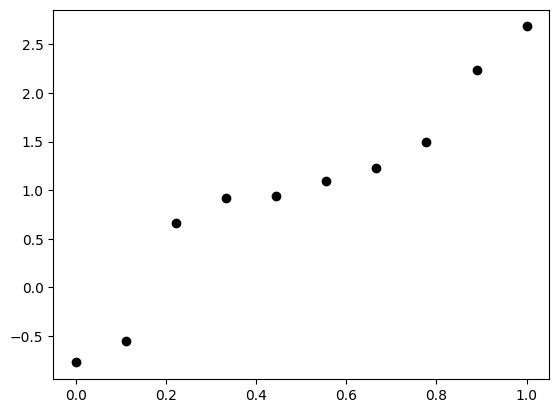

In [69]:
plt.plot(x_data2, y_data2, "ko")

In [70]:
pfit2, pcov2 = curve_fit(f, x_data2, y_data2, p0=(1, 0))
pfit2, pcov2

(array([ 3.04474987, -0.52923876]),
 array([[ 0.10899569, -0.05449784],
        [-0.05449784,  0.03835033]]))

<div class="alert alert-block alert-success">
    <b>Question:</b> What is the correlation coefficient?
</div>

In [71]:
rho = pcov2[0][1] / (pcov2[0][0] * pcov2[1][1])
rho

np.float64(-13.037696123812834)

Here, the off diagonal elements have a significant (negative) non-zero value.

In [72]:
a2, b2 = pfit2

Now we can compensate a slightly higher value of `a` by a slightly lower value of `b`:

In [76]:
%matplotlib inline
from ipywidgets import interact

@interact(
    a_test=(a2 - 0.5, a2 + 0.5, 0.05),
    b_test=(b2 - 0.5, b2 + 0.5, 0.05),
    continuous_update=False
)
def interactive_plot(a_test=a2, b_test=b2):
    plt.plot(x_data2, y_data2, "ko")
    yfit = f(x_data2, a_test, b_test)
    yfit_min = f(x_data2, a2, b2)
    plt.plot(x_data2, yfit, label="test")
    plt.plot(x_data2, yfit_min, "--", label="fit")
    plt.ylim(-2, 4)
    plt.legend()
    plt.show()
    print("Chi2:", ((yfit - y_data2) ** 2).sum())
    print("Chi2_min:", ((yfit_min - y_data2) ** 2).sum())

interactive(children=(FloatSlider(value=3.0447498717924972, description='a_test', max=3.5447498717924972, min=…

In [74]:
b2

np.float64(-0.5292387610685376)

In [75]:
curve_fit(lambda x, b: f(x, a2 + 1, b), x_data2, y_data2, p0=(0))

(array([-1.02923876]), array([[0.02118479]]))

The covariance matrix gives an idea of how much the fitted values would spread if we were to repeat the fit with new random data, assuming our model describes it.

Since we know the "real" distribution of our data points (we generated them after all) we can try this out with toy experiments:

In [77]:
def fit_toy():
    x_data = np.linspace(0, 1, 10)
    y_data = -1 + 3 * x_data + np.random.random_sample(len(x_data))
    pfit, pcov = curve_fit(f, x_data, y_data, p0=(1, 0))
    return pfit, pcov

In [78]:
toy_params = np.array([fit_toy()[0] for _ in range(5000)]).T

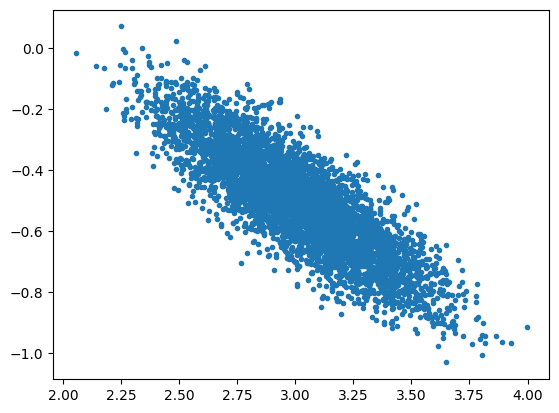

In [79]:
plt.scatter(*toy_params, marker=".")

Compare the empirical covariance matrix of these points to the one determined from the fit:

In [80]:
np.cov(toy_params)

array([[ 0.08022662, -0.04015078],
       [-0.04015078,  0.0283335 ]])

In [81]:
pcov2

array([[ 0.10899569, -0.05449784],
       [-0.05449784,  0.03835033]])

## Error propagation

One thing we can do with this covariance matrix is to visualize uncertainties on the fit using [linear error propagation](https://en.wikipedia.org/wiki/Propagation_of_uncertainty). In this case we can simply calculate it manually:

$$\sigma_y ^ 2 = \left(\frac{\partial y}{\partial a} \sigma_a \right)^2 + \left(\frac{\partial y}{\partial b} \sigma_b \right)^2 + 2\frac{\partial y}{\partial a}\frac{\partial y}{\partial b}\sigma_{ab}$$

where $\sigma_a, \sigma_b$ are the variances and $\sigma_{ab}$ is the covariance. With $y = ax + b$ this becomes:

$$\sigma_y ^ 2 = (x\sigma_a)^2 + \sigma_b^2 + 2x\sigma_{ab}$$

where we can take $\sigma_a, \sigma_b, \sigma_{ab}$ from the covariance matrix:

$$
\begin{pmatrix}
    \sigma_a^2 & \sigma_{ab} \\
    \sigma_{ba} & \sigma_b^2
\end{pmatrix}
$$

Let's visualize it:

In [82]:
sigma_y = np.sqrt((x_data2 * np.sqrt(pcov2[0, 0])) ** 2 + pcov2[1, 1] + 2 * x_data2 * pcov2[0, 1])

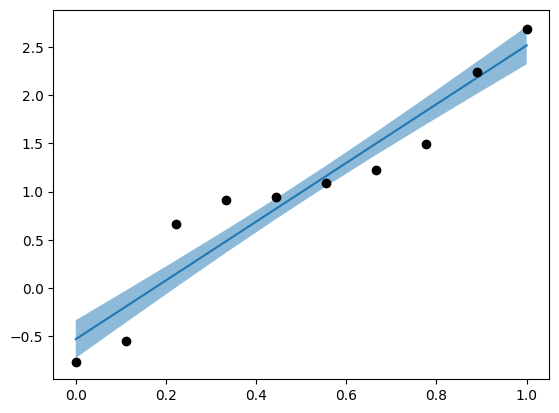

In [85]:
y = f(x_data2, *pfit2)
plt.fill_between(x_data2, y - sigma_y, y + sigma_y, alpha=0.5)
plt.plot(x_data2, y)
plt.plot(x_data2, y_data2, "ko")

For more generic templates/functions you can do that automatically. Either use the [uncertainties](https://pythonhosted.org/uncertainties) package (for functions described by simple formulas) or calculate it numerically by varying each parameter up and down and using half of the resulting interval as a replacement for $\frac{\partial f}{\partial x_i}\sigma_{x_i}$.

Some tools like `RooFit` have functionality for this built in.

## Goodness of fit

Let's have a look at these data points (this time with uncertainties):

In [86]:
x_data = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
y_data = np.array([2.7, 3.9, 5.5, 5.8, 6.5, 6.3, 6.7, 6.2, 6.0])
yerr_data = np.array([0.3, 0.5, 0.7, 0.6, 0.4, 0.3, 0.7, 0.8, 0.5])

<ErrorbarContainer object of 3 artists>

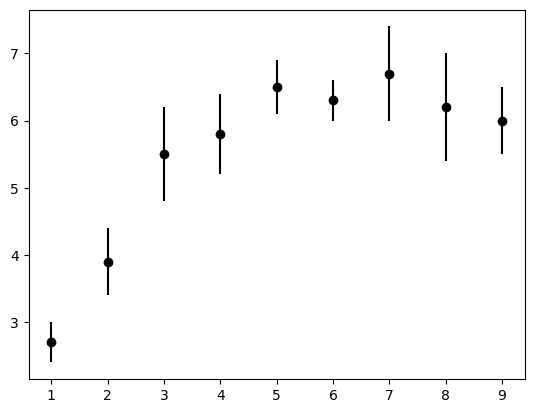

In [87]:
plt.errorbar(x_data, y_data, yerr=yerr_data, fmt="ko")

And fit a line again:

In [88]:
def f_linear(x, a, b):
    return a * x + b

In [89]:
pfit, pcov = curve_fit(f_linear, x_data, y_data, sigma=yerr_data, absolute_sigma=True)

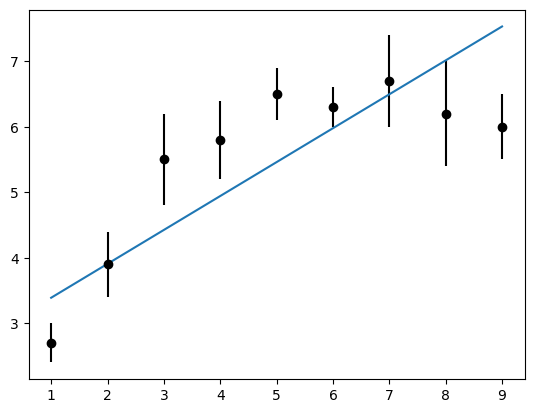

In [90]:
plt.errorbar(x_data, y_data, yerr=yerr_data, fmt="ko")
plt.plot(x_data, f_linear(x_data, *pfit))

That doesn't look very great. How can we quantify the quality of this fit? We look at our $\chi^2$ statistic:

In [91]:
def f_chi2(f, params, x, y, yerr):
    return (((f(x, *params) - y) / yerr) ** 2).sum()

In [92]:
f_chi2(f_linear, pfit, x_data, y_data, yerr_data)

np.float64(28.087601569659455)

Reminder: As a rule of thumb, the number of degrees of freedom "ndf" (number of data points - number of parameters) should be roughly equal to the $\chi^2$ statistic.

In [93]:
len(x_data) - len(pfit)

7

So this rule of thumb already indicates this is not a very nice fit. We can be even more quantitative. This rule comes from the fact that the $\chi^2$ statistic actually follows a [Chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution) (which has ndf as expectation value) if we assume the data points follow a normal distribution. Using this we can calculate a p-value that answers the question "how often would we get such a high value of $\chi^2$ in repeated experiments, given that our function describes the data".

Scipy provides functions for common probability density functions among which there is also the chi-squared distribution. What we want to calculate is

$$p = \int\limits_{\chi^2_\mathrm{min}}^{\infty}f(\chi^2, \mathrm{ndf})\mathrm{d}\chi^2 = 1 - F(\chi^2_\mathrm{min}, \mathrm{ndf})$$

where $F(\chi^2_\mathrm{min}, \mathrm{ndf})$ is the cumulative distribution function of a chi-squared distribution which we can calculate using `scipy.stats.chi2.cdf`:

In [94]:
import scipy.stats

In [95]:
def chi2_pvalue(chi2, ndf):
    return 1 - scipy.stats.chi2.cdf(chi2, ndf)

In [96]:
chi2_pvalue(
    f_chi2(f_linear, pfit, x_data, y_data, yerr_data),
    len(x_data) - len(pfit)
)

np.float64(0.0002119981880295274)

which is rather low, again indicating a bad fit!

<div class="alert alert-block alert-success">

<b>Exercise 5 [medium]:</b> Fit a quadratic function to the data. What is $\chi^2 / \mathrm{ndf}$ now? What is the p-value?

</div>

<div class="alert alert-block alert-success">

<b>Exercise 6 [hard]:</b> Validate with toy MC experiments that the $\chi^2$ test statatistic actually follows a $\chi^2$ distribution with "ndf" parameter equal to (number of data points - number of parameters) for the null hypothesis. The null hypothesis is that data points are gaussian distributed with a mean at the best fit prediction and a width given by <code>yerr_data</code>.

</div>

In [101]:
#5:

def f_quadratic(x, a, b, c):
    return a * x**2 + b * x + c

pfit, pcov = curve_fit(f_quadratic, x_data, y_data, sigma=yerr_data, absolute_sigma=True)

chi2 = f_chi2(f_quadratic, pfit, x_data, y_data, yerr_data)
ndf = len(x_data) - len(pfit)
print(chi2 / ndf)
print(chi2_pvalue(chi2, ndf))

0.2785413028971013
0.9473193312931316


In [102]:
#6:

def toy_chi2():
    y_fit = f_quadratic(x_data, *pfit)
    y_toy = np.random.normal(loc=y_fit, scale=yerr_data) # null hypothesis
    pfit_toy, _ = curve_fit(f_quadratic, x_data, y_toy, sigma=yerr_data, absolute_sigma=True)
    return f_chi2(f_quadratic, pfit_toy, x_data, y_toy, yerr_data)

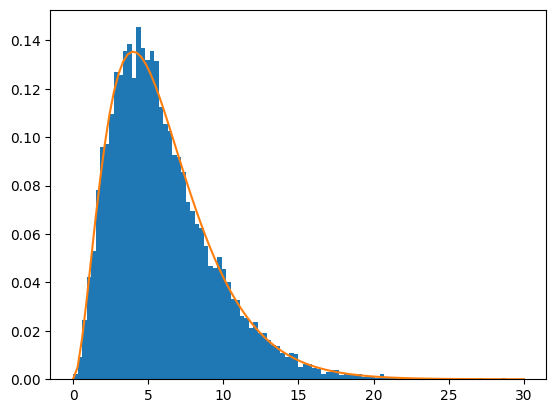

In [107]:
x = np.linspace(0, 30, 100)
plt.hist([toy_chi2() for _ in range(10000)], bins=100, range=(0,30), density=True)
plt.plot(x, scipy.stats.chi2.pdf(x, len(x_data) - 3))